# EDA for KLUE Relation Extraction 대회

In [1]:
# !pip install pandas
# !pip install seaborn==0.11.0

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("./dataset/train/train.csv")

## 데이터 개요
- null 값은 없다.
- train.csv: 총 32470개의 데이터

In [5]:
# df.describe()  # 의미 없음

In [6]:
# 전체 개요
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


## 문장 길이 ("sentence")
- 문장 길이 분포를 확인한 결과 왼쪽으로 광장히 치우쳐 있다. (mean: 97.08, median: 87)

In [7]:
# 정확히는 문자열 길이
sentence_lens = df["sentence"].apply(len)
sentence_lens

0         59
1         54
2         99
3         78
4         56
        ... 
32465    213
32466     67
32467    115
32468     65
32469    106
Name: sentence, Length: 32470, dtype: int64

<AxesSubplot:xlabel='sentence', ylabel='Count'>

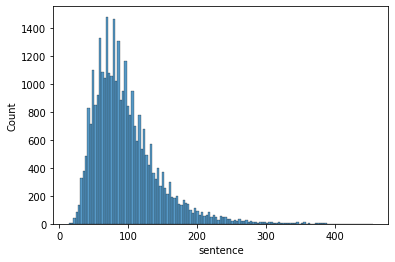

In [8]:
# histogram으로 문장 길이 분포 시각화
sns.histplot(sentence_lens)

In [9]:
# statistics
sentence_lens.describe()

count    32470.000000
mean        97.083954
std         47.939902
min         14.000000
25%         64.000000
50%         87.000000
75%        118.000000
max        455.000000
Name: sentence, dtype: float64

<AxesSubplot:xlabel='sentence'>

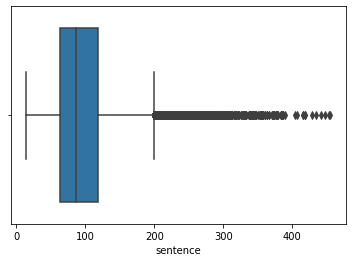

In [10]:
# boxplot으로 시각화
sns.boxplot(sentence_lens)

## Labels
- label별 데이터에 불균형이 존재
- 개체들의 type을 따로 추출한 후 분포 확인 (RE 강의를 먼저 들어야할 듯하다.)

<AxesSubplot:xlabel='count', ylabel='label'>

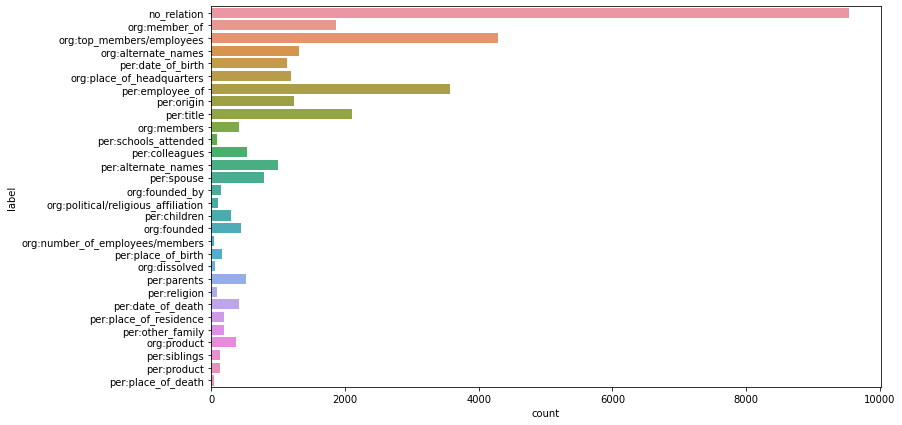

In [16]:
# 라벨별 데이터 개수 시각화
fig, ax = plt.subplots(figsize=(12, 7))
sns.countplot(y=df["label"], ax=ax)

In [13]:
# 개체들의 type을 담은 새로운 csv로 이어서 시각화 (./dataProcess.ipynb 실행 후)
df_type = pd.read_csv("./dataset/train/train_with_type.csv")
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
 6   subject_type    32470 non-null  object
 7   object_type     32470 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.0+ MB


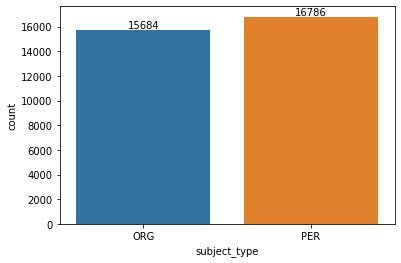

In [14]:
# subject_type 균형 보기

ax = sns.countplot(df_type["subject_type"])
for p in ax.patches:
    ax.annotate(p.get_height(),
        (p.get_x()+0.4, p.get_height()+2), 
        ha='center', va='bottom'
    )

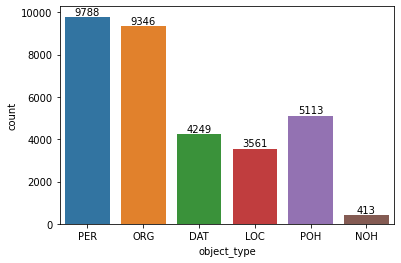

In [15]:
# object_type 균형 보기

ax = sns.countplot(df_type["object_type"])
for p in ax.patches:
    ax.annotate(p.get_height(),
        (p.get_x()+0.4, p.get_height()+2), 
        ha='center', va='bottom'
    )

## source
- source별 데이터 -> 매우 심한 불균형 (하지만 의미가 별로 없는 분석인 듯하다.)

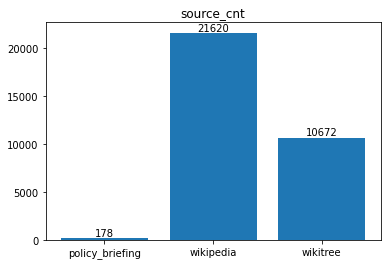

In [17]:
# source별 데이터 개수 확인 (matplotlib)
fig, ax = plt.subplots()

source_cnt = df["source"].value_counts().sort_index()
ax.bar(source_cnt.index, source_cnt)
ax.set_title("source_cnt")
for idx, value in zip(source_cnt.index, source_cnt):
    ax.text(idx, value+5, s=value,
                 ha='center', 
                 va='bottom',
                 fontweight='normal'
                )